<a href="https://colab.research.google.com/github/MarwanAhmed20/Image-Compression-SVD/blob/main/compression_image_by_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Read Image

In [ ]:
path = '/content/1_YMJDp-kqus7i-ktWtks.jpg'

(-0.5, 1023.5, 1023.5, -0.5)

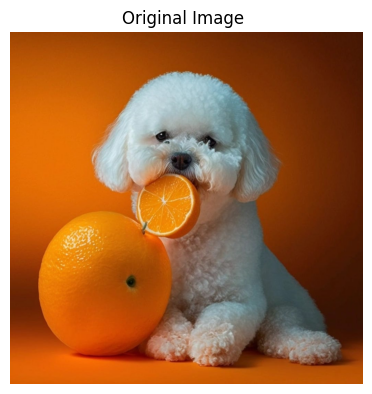

In [ ]:
image = cv2.imread(path) # Read Image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # use cv2.COLOR_BGR2RGB to convert to RGB

# plt image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image ')
plt.imshow(image)
plt.axis('off')

# convert image to gray in 3 ways

In [ ]:
#first way
def way1(image_path):
  img_rgb = cv2.imread(image_path)
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  return img_gray

#second way
def way2(image_path, output_path=None):
  from PIL import Image
  img = Image.open(image_path)
  gray_img = img.convert('L')

  if output_path:
    gray_img.save(output_path)
  return gray_img

#third way
def way3(image_path):
  import tensorflow as tf
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=1)
  return img


*   Check ways




(-0.5, 1023.5, 1023.5, -0.5)

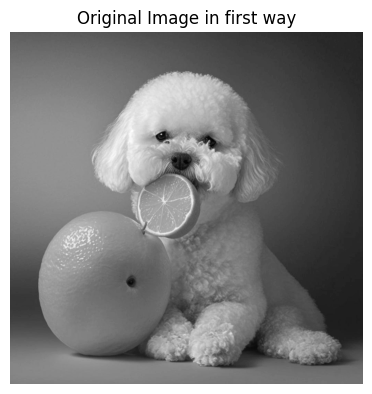

In [ ]:
# way 1
image1 = way1(path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('gray Image in first way')
plt.imshow(image1, cmap='gray')
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

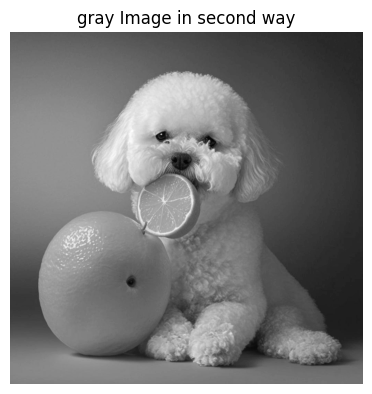

In [ ]:
# way 2
image2 = way2(path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('gray Image in second way')
plt.imshow(image2, cmap='gray')
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

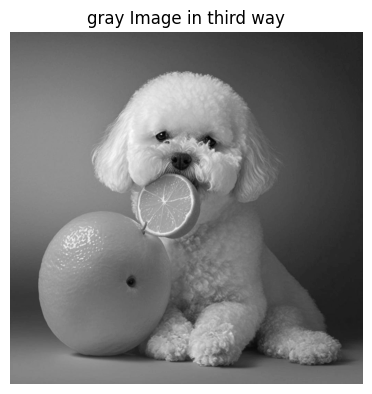

In [ ]:
# way 3
image3 = way3(path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('gray Image in third way')
plt.imshow(image3, cmap='gray')
plt.axis('off')

# Using Singular value decomposition (SVD) To ccompresse the image

In [ ]:
image = image1 #use variable image

In [ ]:
k = 40 # set k to function

In [ ]:
U, s, Vt = np.linalg.svd(image, full_matrices=False) # np.linalg.svd to get A= U ⋅ Σ ⋅ Vt
# Truncate singular values and matrices to reduce rank
U_trun = U[:, :k]   # get
s_trun = np.diag(s[:k])
V_trun = Vt[:k, :]

In [ ]:
# Compress the image using the truncated SVD
compressed_image = np.dot(U_trun, np.dot(s_trun, V_trun))

# show the original image vs compressed image

(-0.5, 1023.5, 1023.5, -0.5)

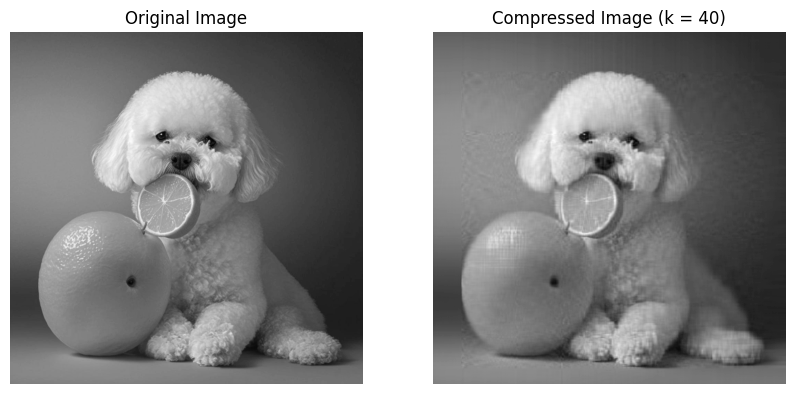

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed Image (k = {})'.format(k))
plt.imshow(compressed_image, cmap='gray')
plt.axis('off')

In [ ]:
cv2.imwrite('output_image.jpg', compressed_image) # save image

we can change k to change noising of compressed image


#  Calculat Compression Ratio


In [ ]:
# calculat Compression Ratio
CR = int(U_trun.shape[0]*k + k + V_trun.shape[0]*k ) / (image.shape[0]*image.shape[1])
CR = CR * 100
print("Compression Ratio:", CR)

Compression Ratio: 4.062652587890625


#  Compare quality of original image and compressed image


In [ ]:
from skimage.metrics import mean_squared_error, structural_similarity, peak_signal_noise_ratio
from sklearn.metrics.pairwise import cosine_similarity

#normalize image to standard images
image = image /255
compressed_image = compressed_image/255

In [ ]:
mse = mean_squared_error(image, compressed_image)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 4.365850442313279e-09


In [ ]:
# Flatten the images to 1D arrays
vector1 = image.flatten().reshape(1, -1)
vector2 = compressed_image.flatten().reshape(1, -1)

similarity = cosine_similarity(vector1, vector2)[0][0]
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.9992545509409001


In [ ]:
ssim = structural_similarity(image, compressed_image)
print(f"Structural Similarity Index (SSIM): {ssim}")


Structural Similarity Index (SSIM): 0.999996129773173


In [ ]:
psnr = peak_signal_noise_ratio(image, compressed_image)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr}")

Peak Signal-to-Noise Ratio (PSNR): 83.59931145674649
